# Task 3

## Question 3.1

First we look into the question, how we can measure diversity between different answers. To calculate the diversity of a subset of answers, we need to differentiate the types of answers. We categorize our answers into two types categorical and continuous.

An example for a categorical column is gender. We can measure the diversity in this case with the measure entropy. Since entropy measures how spread out or balanced the selected values are it is ideal. In the end we want to normalize the entropy to account for classes that are not in the selected subset.

For continuous data columns like age we can measure the diversity using the standard deviation. We could also use the entropy and treat every age as a separate class. However, this would mean that we don't account for the absolute age difference between workers, just for different ages. We therefor decided that the standard deviation is the better metric. We also need to normalize it in the end, to have a value between 0 and 1, therefore we need to divide the standard deviation of our subset by the maximum possible standard deviation of the original dataset. This is done by calculating the difference of the maximum and minimum values of the original dataset and then dividing it by two.

In the end we calculate our total diversity score by calculating the diversity of each relevant column and then generating their mean.

In [235]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv('../../data/answerList_data.csv')
df['correctness'] = (((df['GroundTruth'] == 0.0) & (df['Answer.option'] == 'NO')) | (
        (df['GroundTruth'] == 1.0) & (df['Answer.option'] == 'YES'))).astype(int)

df

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,correctness
0,261,HIT01_8,0,90.984,4,2,0,0,1,0,...,832cg-7G1i-462:73eI-8E-2g-985,5,Undergraduate_Student,7.0,21,Male,High School,United States,Java; C++; C#,1
1,262,HIT01_8,0,133.711,5,1,0,0,1,0,...,98ce7A-4i-507,4,Undergraduate_Student,10.0,25,Female,High School;University;Web,United States,c#,1
2,263,HIT01_8,0,77.696,5,2,0,0,1,0,...,881AC0I2E-625:135cI3E-7e8-86,5,Professional_Developer,7.0,24,Male,High School;University;Web,United States,C++;Java;PHP,1
3,264,HIT01_8,0,46.644,1,1,0,0,1,0,...,270eG-5c6A3-46:65eI-2i-2I-9-36,5,Professional_Developer,20.0,38,Male,High School;University;Other On the job,USA,C#,1
4,265,HIT01_8,0,215.416,5,5,0,0,1,0,...,844Cg1g5e1-17:255ei-8G8E85-8,3,Undergraduate_Student,5.0,19,Male,High School;University;Web,United States,C++; Java,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2316,HIT08_54,128,220.420,2,4,0,0,1,0,...,1171ea-4g-6C-73-8,3,Graduate_Student,2.0,28,Male,University,USA,C#,1
2576,2317,HIT08_54,128,322.790,4,3,0,0,0,0,...,66AC-5a0g-47-9:1443IA-7C-6e967,5,Professional_Developer,17.0,39,Male,University;Web,USA,C#; VB.NET; Java,0
2577,2318,HIT08_54,128,159.530,5,1,0,0,1,0,...,106iG8G-9I-9-80:590CG-6G-7i-71-9,4,Professional_Developer,10.0,31,Male,High School;University;Web;Other work,usa,C++,1
2578,2319,HIT08_54,128,68.578,5,1,0,0,1,0,...,1221iC8A5A242:495CC9e6a691:11aE2c-4c-9-86,4,Undergraduate_Student,4.0,19,Male,University;Web;Other FIRST Robotics,United States,C++,1


In [237]:
df_question_1 = df[df['Question.ID'] == 1]
df_question_1_correct = df_question_1[df_question_1['correctness'] == 1]

df_question_1_correct

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,correctness
20,441,HIT01_8,1,140.407,4,3,1,1,0,0,...,35Eg-6i-8G-2-6-8,3,Undergraduate_Student,3.0,49,Female,University,US,php,1
22,443,HIT01_8,1,112.409,5,2,1,1,0,0,...,286Ig-9C0E170,5,Undergraduate_Student,5.0,20,Male,University;Web,USA,c#,1
23,444,HIT01_8,1,76.418,5,1,1,1,0,0,...,1221iC8A5A242:495CC9e6a691:11aE2c-4c-9-86,4,Undergraduate_Student,4.0,19,Male,University;Web;Other FIRST Robotics,United States,C++,1
24,445,HIT01_8,1,261.928,5,2,1,1,0,0,...,555aC0a8e4-8-3:535CE8A-5e-95-2,3,Graduate_Student,1.0,25,Female,University,USA,java,1
25,446,HIT01_8,1,236.045,5,1,1,1,0,0,...,815aA-9g-4e44-8:182Ae3g-6i-30-5,5,Professional_Developer,5.0,29,Male,University;Other On the job,USA,Python; SQL; Java,1
27,448,HIT01_8,1,259.790,3,3,1,1,0,0,...,78cA-9e4a2-6-7,5,Hobbyist,1.0,30,Female,University,united states,none,1
28,449,HIT01_8,1,230.142,4,3,1,1,0,0,...,1449GA0I-4C14-1,4,Undergraduate_Student,4.0,35,Male,High School,USA,php and C++,1
29,450,HIT01_8,1,253.302,4,2,1,1,0,0,...,41eI0e3i-806:568Ae7g8c-7-1-2,5,Hobbyist,4.0,35,Male,University;Web;Other MOOC,USA,Java Python,1
30,451,HIT01_8,1,89.521,4,3,1,1,0,0,...,1523iA8C4C-602,5,Professional_Developer,14.0,34,Male,High School;University;Web;Other books,Russia,C++;Object Pascal,1
34,455,HIT01_8,1,161.419,4,4,1,1,0,0,...,1573Ic-9c3a-7-13,5,Graduate_Student,2.0,24,Male,University,India,c; c++,1


In [238]:
df_selection = df_question_1_correct[:8]

df_selection

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,correctness
20,441,HIT01_8,1,140.407,4,3,1,1,0,0,...,35Eg-6i-8G-2-6-8,3,Undergraduate_Student,3.0,49,Female,University,US,php,1
22,443,HIT01_8,1,112.409,5,2,1,1,0,0,...,286Ig-9C0E170,5,Undergraduate_Student,5.0,20,Male,University;Web,USA,c#,1
23,444,HIT01_8,1,76.418,5,1,1,1,0,0,...,1221iC8A5A242:495CC9e6a691:11aE2c-4c-9-86,4,Undergraduate_Student,4.0,19,Male,University;Web;Other FIRST Robotics,United States,C++,1
24,445,HIT01_8,1,261.928,5,2,1,1,0,0,...,555aC0a8e4-8-3:535CE8A-5e-95-2,3,Graduate_Student,1.0,25,Female,University,USA,java,1
25,446,HIT01_8,1,236.045,5,1,1,1,0,0,...,815aA-9g-4e44-8:182Ae3g-6i-30-5,5,Professional_Developer,5.0,29,Male,University;Other On the job,USA,Python; SQL; Java,1
27,448,HIT01_8,1,259.790,3,3,1,1,0,0,...,78cA-9e4a2-6-7,5,Hobbyist,1.0,30,Female,University,united states,none,1
28,449,HIT01_8,1,230.142,4,3,1,1,0,0,...,1449GA0I-4C14-1,4,Undergraduate_Student,4.0,35,Male,High School,USA,php and C++,1
29,450,HIT01_8,1,253.302,4,2,1,1,0,0,...,41eI0e3i-806:568Ae7g8c-7-1-2,5,Hobbyist,4.0,35,Male,University;Web;Other MOOC,USA,Java Python,1


In [239]:
def categorical_diversity(series):
    counts = series.value_counts(normalize=True)
    return entropy(counts, base=2)


def categorical_diversity_norm(series, series_full):
    k = series_full.nunique()
    return categorical_diversity(series) / (np.log2(k) if k > 1 else 1)


gender_diversity = categorical_diversity(df_selection['Worker.gender'])
gender_diversity_norm = categorical_diversity_norm(df_selection['Worker.gender'], df_question_1_correct['Worker.gender'])

display(gender_diversity)
display(gender_diversity_norm)

np.float64(0.954434002924965)

np.float64(0.954434002924965)

In [240]:
def coefficient_variation(series, series_full):
    if len(series) < 2:
        return 0
    return series.std() / ((series_full.max() - series_full.min()) / 2)

age_diversity = coefficient_variation(df_selection['Worker.age'], df_question_1_correct['Worker.age'])

age_diversity

np.float64(0.16152792279129277)

In [241]:
def combined_diversity_score(df_selection, df_all, categorical_cols, continuous_cols):
    total_number_cols = len(categorical_cols) + len(continuous_cols)


    categorical_score = sum(1 / total_number_cols * categorical_diversity_norm(df_selection[col], df_all[col]) for col in categorical_cols)
    continuous_score = sum(1 / total_number_cols * coefficient_variation(df_selection[col], df_all[col]) for col in continuous_cols)

    return categorical_score + continuous_score

def list_diversity_scores(df_selection, df_all, categorical_cols, continuous_cols):
    total_number_cols = len(categorical_cols) + len(continuous_cols)

    categorical_scores = [1 / total_number_cols * categorical_diversity_norm(df_selection[col], df_all[col]) for col in categorical_cols]
    continuous_scores = [1 / total_number_cols * coefficient_variation(df_selection[col], df_all[col]) for col in continuous_cols]

    return categorical_scores + continuous_scores

In [242]:
categorical_cols = ['Worker.profession', 'Worker.gender']
continuous_cols = ['Worker.yearsOfExperience', 'Worker.age']

diversity_score = combined_diversity_score(df_selection, df_question_1_correct, categorical_cols, continuous_cols)

diversity_score

np.float64(0.5060633450158194)

In [243]:
def select_n(df, n):
    return df.sample(n=n)

In [244]:
for n in range(1, 10):
    sample_df = select_n(df_question_1_correct, n)
    div_scores = list_diversity_scores(sample_df, df_question_1_correct, categorical_cols, continuous_cols)
    print('Sample df\n', sample_df[categorical_cols+continuous_cols])
    print('Diversity score\n', div_scores)
    print('Total diversity score', combined_diversity_score(sample_df, df_question_1_correct, categorical_cols, continuous_cols))
    print('\n\n')


Sample df
         Worker.profession Worker.gender  Worker.yearsOfExperience  Worker.age
36  Undergraduate_Student          Male                       9.0          27
Diversity score
 [np.float64(0.0), np.float64(0.0), 0.0, 0.0]
Total diversity score 0.0



Sample df
          Worker.profession Worker.gender  Worker.yearsOfExperience  Worker.age
34        Graduate_Student          Male                       2.0          24
30  Professional_Developer          Male                      14.0          34
Diversity score
 [np.float64(0.125), np.float64(0.0), np.float64(0.044194173824159216), np.float64(0.02946278254943948)]
Total diversity score 0.1986569563735987



Sample df
          Worker.profession Worker.gender  Worker.yearsOfExperience  Worker.age
20   Undergraduate_Student        Female                       3.0          49
27                Hobbyist        Female                       1.0          30
25  Professional_Developer          Male                       5.0          29
Di

N: 1 Avg Entropy: 0.0
N: 2 Avg Entropy: 0.24862443249833102
N: 3 Avg Entropy: 0.338825763929842
N: 4 Avg Entropy: 0.4339674516936277
N: 5 Avg Entropy: 0.40149614584550364
N: 6 Avg Entropy: 0.4585265187293385
N: 7 Avg Entropy: 0.48961455201589443
N: 8 Avg Entropy: 0.4715975302703316
N: 9 Avg Entropy: 0.5066331036262397


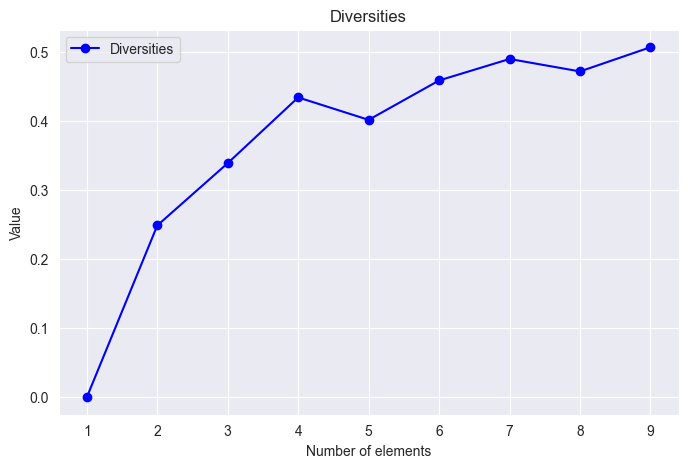

In [245]:
RUNS = 20
diversities = []
for n in range(1, 10):
    sum_diversity = 0
    for _ in range(RUNS):
        sample_df = select_n(df_question_1_correct, n)
        sum_diversity += combined_diversity_score(sample_df, df_question_1_correct, categorical_cols, continuous_cols)
    print('N:', n, 'Avg Entropy:', sum_diversity/RUNS)
    diversities.append(sum_diversity/RUNS)

plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(range(1, 10), diversities, marker='o', linestyle='-', color='b', label="Diversities")

# Labels and title
plt.xlabel("Number of elements")
plt.ylabel("Value")
plt.title("Diversities")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()